In [12]:
!pip install reservoirpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 44 kB 6.4 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 86 kB 13.3 MB/s            
  Created wheel for reservoirpy: filename=reservoirpy-0.2.4-py3-none-any.whl size=53043 sha256=beda861e6ad8b07eeb7ae81501c2cab258462caffa3b25ea2ac7cebf7a74f4d1
  Stored in directory: /home/CAMPUS/txaa2019/.cache/pip/wheels/4d/46/8b/5290cda9a86d365da35373139cca383e51c3c4c272aa66aa74
Successfully built reservoirpy


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from reservoirpy import mat_gen, ESN
from lagrangian.simulate_data import generate_train_ideal

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
x_train, xt_train, y_train, x_test, xt_test, y_test = generate_train_ideal()

generating data...


In [3]:
print(xt_train)

[[  0.           0.          -8.982129    -2.1508672 ]
 [ -4.6661725   -0.63316566  -6.55462     28.74602   ]
 [  4.414217    -0.6399282   16.750904   -21.7572    ]
 ...
 [  6.8459344   -6.4956493  -37.44392     65.28069   ]
 [ -4.729326     2.3417275    4.175431   -29.827314  ]
 [ -2.3600051   -4.6696014    4.8004866   -1.0227684 ]]


In [4]:
print(y_train)

[[ 1.3459477e+00  2.3560867e+00 -8.9807421e-02 -2.1549953e-02]
 [-4.7437480e-01 -1.1860635e+00 -4.7307191e+00 -3.4675455e-01]
 [-1.2014768e+00 -4.2006630e-01  4.5864191e+00 -8.6562562e-01]
 ...
 [-6.3968755e-02  2.0020955e+02  6.4934750e+00 -5.8657670e+00]
 [ 7.7952999e-01  2.0281383e+02 -4.6925735e+00  2.0445077e+00]
 [-1.2846169e+00  1.9699382e+02 -2.3113575e+00 -4.6814666e+00]]


In [5]:
print(x_train)

[[ 1.3463968e+00  2.3561945e+00  0.0000000e+00  0.0000000e+00]
 [-4.2738873e-01 -1.1811658e+00 -4.6661725e+00 -6.3316566e-01]
 [-1.2464720e+00 -4.1255212e-01  4.4142170e+00 -6.3992822e-01]
 ...
 [-1.3062775e-01  2.0027132e+02  6.8459344e+00 -6.4956493e+00]
 [ 8.2663119e-01  2.0279190e+02 -4.7293258e+00  2.3417275e+00]
 [-1.2612591e+00  1.9704057e+02 -2.3600051e+00 -4.6696014e+00]]


In [15]:
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
density = 0.1
input_connectivity = 0.2
regularization = 1e-8
seed = 1234

In [23]:
def reset_esn():
    Win = mat_gen.generate_input_weights(units, 4, input_scaling=input_scaling,
                                     proba=input_connectivity, input_bias=True,
                                     seed=seed)

    W = mat_gen.generate_internal_weights(units, sr=spectral_radius,
                                  proba=density, seed=seed)

    reservoir = ESN(leak_rate, W, Win, ridge=regularization)

    return reservoir

In [24]:
Win = mat_gen.generate_input_weights(units, 4, input_scaling=input_scaling,
                                     proba=input_connectivity, input_bias=True,
                                     seed=seed)

W = mat_gen.generate_internal_weights(units, sr=spectral_radius,
                              proba=density, seed=seed)

reservoir = ESN(leak_rate, W, Win, ridge=regularization)

In [26]:
states = reservoir.train([x_train], [y_train], return_states=True, verbose=True)

y_pred, states1 = reservoir.run([x_test], init_state=states[0][-1], return_states=True, verbose=True)

states1 = states1[0]

Training on 1 inputs (2000 steps) -- wash: 0 steps


Train: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1792.07it/s]


Running on 1 inputs (2000 steps)


Run: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1787.14it/s]


In [32]:
y_pred = y_pred[0]

In [30]:
print(y_test)

[[ 1.3459477e+00  2.3560867e+00 -8.9807421e-02 -2.1549953e-02]
 [-4.7277421e-01 -1.1859441e+00 -4.7285657e+00 -3.5640651e-01]
 [-1.2092955e+00 -4.1861990e-01  4.5562797e+00 -8.2587337e-01]
 ...
 [-1.5976549e+00  5.2403103e+01 -1.0847894e+00 -1.0407369e+00]
 [ 1.2600939e+00  4.9110470e+01  1.8505059e+00 -3.9182303e+00]
 [ 7.8160000e-01  4.3939690e+01 -4.0248173e-01 -7.4918451e+00]]


In [31]:
def radial2cartesian(t1, t2, l1, l2):
  # Convert from radial to Cartesian coordinates.
  x1 = l1 * np.sin(t1)
  y1 = -l1 * np.cos(t1)
  x2 = x1 + l2 * np.sin(t2)
  y2 = y1 - l2 * np.cos(t2)
  return x1, y1, x2, y2

In [33]:
L1, L2 = 1, 1
theta1_pred, theta2_pred = y_pred[:, 0], y_pred[:, 1]
cart_coords_pred = radial2cartesian(theta1_pred, theta1_pred, L1, L2)

In [34]:
L1, L2 = 1, 1
theta1_act, theta2_act = y_test[:, 0], y_test[:, 1]
cart_coords_act = radial2cartesian(theta1_act, theta1_act, L1, L2)

In [35]:
def cart_error_over_time(cart_coords_model, cart_coords_ana):
    x11, y11, x21, y21 = cart_coords_ana
    x12, y12, x22, y22 = cart_coords_model
    
    distance_1 = np.sqrt((np.square(np.absolute(x11 - x12)) + np.square(np.absolute(y11 - y12))))
    distance_2 = np.sqrt((np.square(np.absolute(x21 - x22)) + np.square(np.absolute(y21 - y22))))
    
    index = np.arange(np.size(distance_1))
    
    plt.plot(index, distance_1, label='first')
    plt.plot(index, distance_2, label='second')
    
    plt.show

    plt.show()

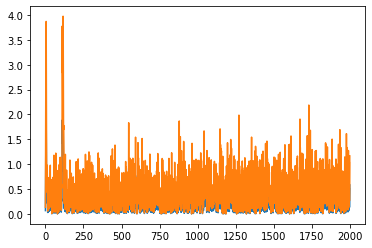

In [37]:
cart_error_over_time(cart_coords_pred[:200], cart_coords_act[:200])